In [ ]:
from diffusers import DiffusionPipeline, StableDiffusionPipeline, EulerDiscreteScheduler, StableDiffusionImageVariationPipeline
import torch
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from io import BytesIO
import requests

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
prompt = "Create a serene landscape with a mountain in the background, a flowing river in the foreground, and a clear blue sky."
negative_prompt = "Do not include any human or animal figures in the landscape."
pretrained_model_or_path =  "stabilityai/stable-diffusion-2-1-base"
num_images_per_prompt = 3
num_inference_steps = 100
height = 512
width = 512
guidance_scale = 8

In [ ]:
scheduler = EulerDiscreteScheduler.from_pretrained(pretrained_model_or_path, subfolder="scheduler")
pipeline = StableDiffusionPipeline.from_pretrained(pretrained_model_or_path ,
                                                   scheduler=scheduler, torch_dtype=torch.float16).to("cuda")

In [ ]:
generator = torch.Generator(device="cuda").manual_seed(123)
imagem = pipeline(prompt=prompt, num_images_per_prompt=num_images_per_prompt,
           negative_prompt = negative_prompt,
           num_inference_steps=num_inference_steps,
           height = height, width = width,
           guidance_scale = guidance_scale,
           generator = generator
           )

  0%|          | 0/100 [00:00<?, ?it/s]

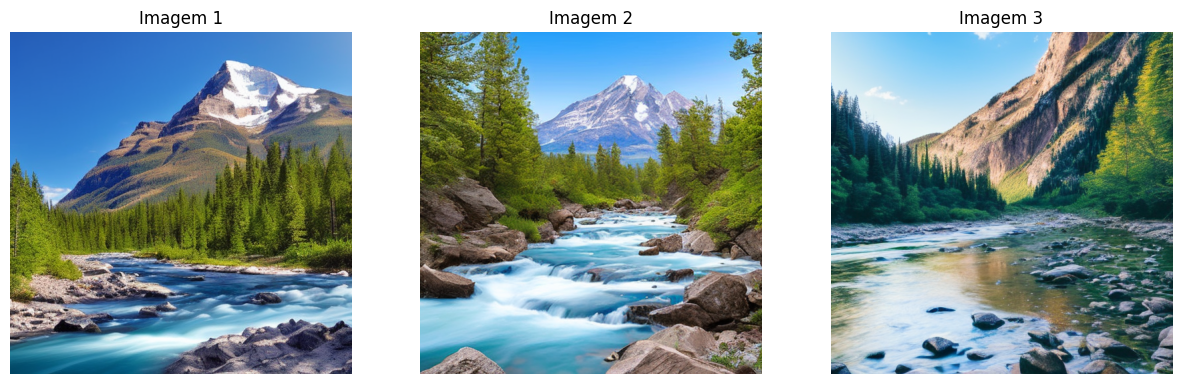

In [ ]:
num_images = len(imagem["images"])
plt.figure(figsize=(15,5))
for i, img in enumerate(imagem["images"]):
    plt.subplot(1, num_images, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Imagem {i+1}')
plt.show()